# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 18 : Least Angle Regression, Elastic Net </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> October 24, 2018 </center>

# COMP 562

Plan for today

1. Review Coordinate Descent for Ridge and Lasso
2. Full regularization path solution
3. Least Angle Regression solver for Lasso
4. Issues with Lasso 
5. Elastic Net
6. Coordinate descent for Elastic Net


$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ee}{\mathbf{e}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\YY}{\mathbf{Y}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\DD}{\mathbf{D}}
\renewcommand{\dd}{\mathbf{d}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\EEE}{\mathbf{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\corr}[2]{\textrm{corr}(#1,#2)}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\UU}{\mathbf{U}}
\renewcommand{\uu}{\mathbf{u}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\sss}{\mathbf{s}}
\renewcommand{\rr}{\mathbf{r}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
\renewcommand{\argmin}{\mathop{\textrm{argmin}}}
\renewcommand{\abs}[1]{\left\lvert#1\right\rvert}
\renewcommand{\sign}{\textrm{sign}}
\renewcommand{\minimize}{\mathop{\textrm{minimize}}}
$$



In [21]:
 def draw_contours(b1s,b2s,objective,n=40):
    B1s, B2s = np.meshgrid(b1s,b2s)
    O = np.zeros((len(b1s),len(b2s)))
    for (i,b1) in enumerate(b1s):
        for (j,b2) in enumerate(b2s):
            beta = np.asarray([[b1],[b2]])
            O[i,j] = objective(beta)
    plt.contour(B1s,B2s,O,n)  


# Sparsity in Parameters

Optimization of ridge penalized linear regression objective
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + \underbrace{\frac{\alpha}{2}\sum_j\beta_j^2}_{\textrm{ridge penalty}}}^{\textrm{Ridge Regression}}
$$
does not produce sparse $\bbeta$.

We can consider other functions in place of ridge penalty
$$
\overbrace{\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + 
\underbrace{\lambda\sum_j \abs{\beta_j}}_{\ell_1 \textrm{ penalty}}}^{\textrm{LASSO regression}}.
$$

# Coordinate Descent for Penalized Linear Regression 

Updates for $\beta_k$ variable for Ridge and Lasso

\begin{align}
\beta^{\new}_k  &= \frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k + \alpha} \tag{Ridge}\\
\beta_k^\new &= S\left(\frac{\xx_k^T\yy^{[-k]}}{\xx_k^T\xx_k},\lambda\right) \tag{Lasso}
\end{align}

where 
$$
y_i^{[-k]} = y_i - \sum_{j\neq k} \beta_j x_{ij} 
$$ 

and 
$$
S(y,\lambda) = \sign(y)\max(\abs{y}-\lambda,0) 
$$

(10L, 1L)


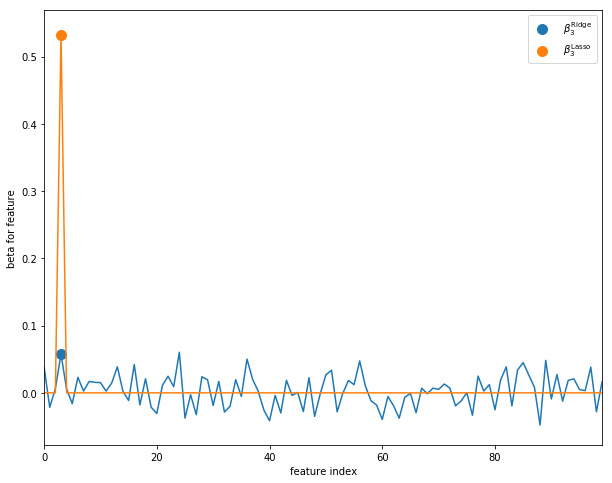

In [22]:
# a toy example
from sklearn.linear_model import Ridge, Lasso
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
n = 10
p = 100
X = np.random.randn(n,p)
# use fourth feature
y = 1.0*X[:,[3]] + 0.2*np.random.randn(n,1)
print y.shape

# objective is 1/2*||y - X*beta||^2 + alpha||beta||^2
model = Ridge(alpha=1)
model.fit(X,y)
betas = model.coef_[0]
fig = plt.figure(figsize=(10,8))
plt.plot(betas)
plt.scatter(3,betas[3],s=100,label=' $\\beta^{\mathrm{Ridge}}_3$ ')

model2 = Lasso(alpha=0.3)
model2.fit(X,y)
betas2 = model2.coef_
plt.plot(betas2)
plt.scatter(3,betas2[3],s=100,label=' $\\beta^{\mathrm{Lasso}}_3$ ')

plt.xlabel('feature index')
plt.ylabel('beta for feature');
plt.xlim([0,p-1])
plt.legend(scatterpoints = 1)

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

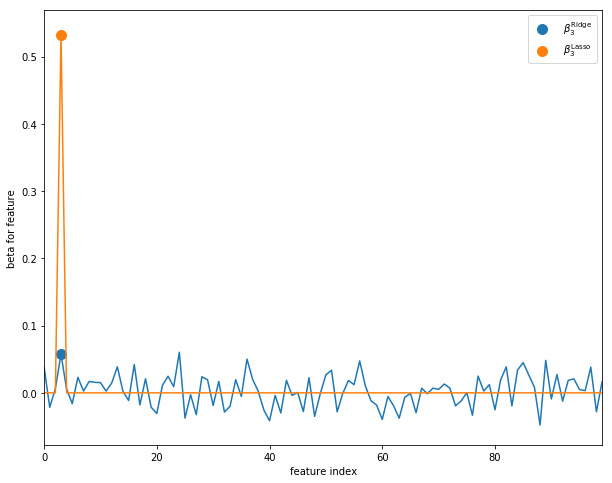

In [23]:
show_figure(fig)
plt.show()

# Regularization Path for Penalized Regression

For different values of $\lambda$ in Lasso regression we obtain solutions with different levels of sparsity

<img src="./Images/lasso-regularization-path.png" width="550" align="center"/>

Guessing at the level of sparsity for particular $\lambda$ is non-trivial, we would have to construct a list of candidates and fit the lasso model for each of them

**<font color='red'> Suppose you know that for $\lambda=1.0$ number of non-zeros (nnz) $\beta$s is 4 and $\lambda=2.0$ nnz $\beta$s is 6. How would you find $\lambda$ for which nnz $\beta$s is 5? </font>**

# Least Angle Regression (LARS)

It turns out that there is relatively elegant algorithm for obtaining the full regularization path without having to guess at $\lambda$ schedule, assume predictors $\xx_i$ are normalized (mean 0, norm 1) and $\yy$ is centered (mean 0) 

1. Start with all coefficients $\beta$ equal to zero and set Riseduaal $\rr = \yy$
2. Find the predictor $\xx_j$ most correlated with $\rr$
$$
j = \argmax_i \abs{\corr{\xx_i}{\rr} }
$$
3. Increase the coefficient $\beta _{j}$ in the direction of the sign of its correlation with $\rr$, and and update $\rr = \yy - \beta_j\xx_j$ until some other predictor $\xx_k$ has as much correlation with $\rr$ as $\xx_j$ has
$$
\abs{\corr{\xx_j}{\rr}} = \abs{\corr{\xx_k}{\rr} }
$$
for $k\neq j$
4. Increase $( \beta _{j}, \beta _{k})$ in their joint least squares direction, until some other predictor $\xx_m$ has as much correlation with the residual $\rr$
$$
\abs{\corr{\xx_j \beta_j + \xx_k \beta_k}{\rr}} = \abs{\corr{\xx_m}{\rr}} 
$$
5. Continue until: all predictors are in the model

# Least Angle Regression (LARS)

LARS provides solutions with increasingly many nnz entries

<img src="./Images/lars-path.png" width="700" align="center"/>


# Issues with Lasso

Lasso objective does not spread weights around on correlated predictors

For example, given two equal predictors $\xx_1 = \xx_2$, Lasso objective

$$
 \frac{1}{2} \norm{\yy  - \xx_{1}\beta_1 - \xx_{2}\beta_2}^2 + \lambda(\abs{\beta_1} + \abs{\beta_2})
 $$
 
does not have any preference among solutions $(\beta,0)$ $(\beta/2,\beta/2)$ $(0,\beta)$

Hence, we can not interpret 0 weight as indication of the predictor being uninformative


# Combining Penalties

Lasso gives us sparsity.
$$
\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + 
\underbrace{\lambda\sum_j \abs{\beta_j}}_{\ell_1 \textrm{ penalty}}.
$$

Ridge splits weights between correlated predictors.
$$
\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + \underbrace{\frac{\alpha}{2}\sum_j\beta_j^2}_{\textrm{ridge penalty}}
$$


What happens if we combine lasso and ridge?
$$
\underbrace{\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2}_{\textrm{Negative Log Likelihood}} + \overbrace{\underbrace{\frac{\alpha}{2}\sum_j\beta_j^2}_{\textrm{ridge penalty}} + \underbrace{\lambda\sum_j \abs{\beta_j}}_{\ell_1 \textrm{ penalty}}}^{\textrm{elastic net}}
$$

Text(0.5,1,'Level Curves of elastic net\n$\\ell_1 + \\rm{ridge}$')

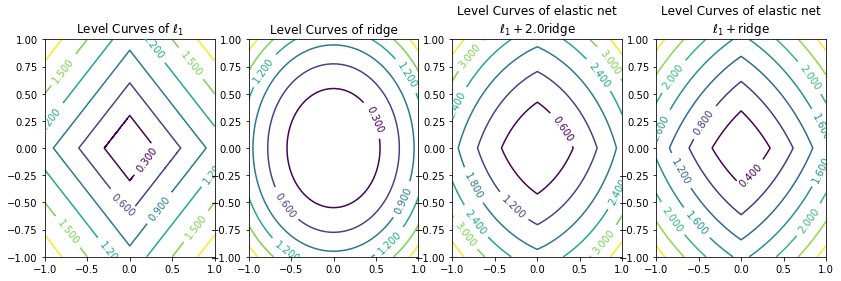

In [24]:
x = np.arange(-1.0, 1.01, 0.01)
y = np.arange(-1.0, 1.01, 0.01)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(14,4))
plt.subplot(1,4,1)
CS = plt.contour(X, Y, np.abs(X)+np.abs(Y))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of $\\ell_1$')
plt.subplot(1,4,2)
CS = plt.contour(X, Y, X**2.0+Y**2.0)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of ridge')
plt.subplot(1,4,3)
CS = plt.contour(X, Y, np.abs(X)+np.abs(Y) + X**2.0+Y**2.0)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of elastic net\n$\ell_1 + 2.0 \\rm{ridge}$')
plt.subplot(1,4,4)
CS = plt.contour(X, Y, np.abs(X)+np.abs(Y) + 0.5*X**2.0+0.5*Y**2.0)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Level Curves of elastic net\n$\\ell_1 + \\rm{ridge}$')

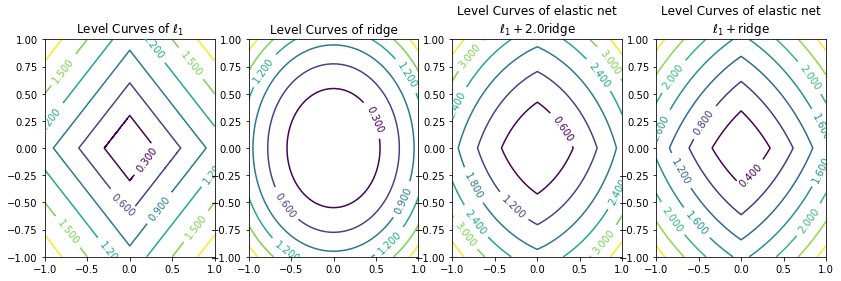

In [25]:
show_figure(fig)
plt.show()

# Do we Need another Solver?

LARS can solve Lasso 
$$
\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2+ \lambda\sum_j \abs{\beta_j}
$$
very efficiently.

Can we use it to solve?
$$
\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2+ \frac{\alpha}{2}\sum_j\beta_j^2+\lambda \sum_j \abs{\beta_j}
$$

# Ridge is Analgous to having Additional Training Samples

$$
\frac{\alpha}{2}\sum_j \beta_j^2 = \frac{1}{2}\sum_{j=1}^p ( 0 - \sqrt{\alpha}\beta_j )^2 
$$

More succinctly, using $0_p$ to denote a p-long 0 vector and $I_p$ to denote an identity matrix of size $p$

$$
\frac{\alpha}{2}\sum_j \beta_j^2 = \frac{1}{2}\norm{\underbrace{0_p}_{\yy} - \underbrace{\sqrt{\alpha}I_p}_{\XX}\bbeta}^2
$$

Hence, **ridge penalty** is analogous to negative log-likelihood of a regression problem where all $y$s are 0 and predictor matrix is diagonal and populated by $\sqrt{\alpha}$

# Ridge is Analgous to Having additional Training Samples
Hence

$$
\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2+\frac{\alpha}{2}\sum_j\beta_j^2
$$

is equal to 

$$
\frac{1}{2}\norm{\begin{bmatrix}\yy \\ 0_p \end{bmatrix} - \begin{bmatrix}\XX\\\sqrt{\alpha} I_p \end{bmatrix} \bbeta }_2^2
$$

In words, adding ridge penalty is equivalent to adding $p$ -- number of predictors -- samples each with $y$ being 0, and only one of the predictors being non-zero and equal to $\sqrt{\alpha}$

Note: Frequently penalties and priors can be interpreted as adding samples to the dataset. These samples are referred to as pseudo-samples

# Elastic Net using Lasso Solver

Elastic net is just a Lasso problem with some additional samples:

$$
\frac{1}{2}\norm{\yy - \XX\bbeta}_2^2+ \frac{\alpha}{2}\sum_j\beta_j^2+\lambda \sum_j \abs{\beta_j}
$$

is same as

$$
\frac{1}{2}\norm{\begin{bmatrix}\yy \\ 0_p \end{bmatrix} - \begin{bmatrix}\XX\\\sqrt{\alpha} I_p \end{bmatrix} \bbeta }^2_2+\lambda \sum_j \abs{\beta_j}
$$

A variant of LARS that takes advantage of this observation is called LARS-EN

# Coordinate Descent update for Elastic Net

We will state it without derivation, under assumption of normalized predictors:

$$
\beta_k^{\new} = \frac{ S(\xx_k^T\yy^{[-k]},\lambda) }{1 + \alpha}
$$

The shrinkage and thresholding operator shrinks by subtracting $\lambda$ followed by scaling by $(1 + \alpha)$.

As a result, training using Elastic Net produce models with downward biased predictions -- $\beta$s are small and consequently $\hat{\yy} = \xx\beta$ is small too

# Naive Elastic Net

Weights obtained straight from the elastic net fit are called naive

They are biased down and achieve worse prediction than Lasso weights

The correction typically used to reduce prediction error is to rescale the weights:

$$
\beta^{\textrm{Elastic Net}}_k = (1+\alpha)\beta^{\textrm{Naive Elastic Net}}_k
$$

Note that the rescaling happens after the fit, not during that procedure

# Trickery with Lasso

Lasso and Elastic Net perform selection of predictors ($\beta_k \neq 0$)

You can reduce training error by pruning away the predictors with zero weights, and refiting using plain linear regression

This will reduce training error and unshrink the weights

Note, that this may or may not improve your performance on a test set, but it will certainly reduce training error


# Other Penalties -- Fused Lasso

Fused lasso promotes sparsity in
1. Predictor weights -- same as Lasso
2. Differences between predictors weights

$$
\lambda_1\sum_j \abs{\beta_j - \beta_{j-1}} + \lambda_2\sum_j\abs{\beta_j}
$$

For this to make sense, there has to exist an order among predictors

A generalization of fused lasso allows differencing to be arbitrary

$$
\lambda_1\sum_j \abs{D\bbeta} + \lambda_2\sum_j\abs{\beta_j}
$$

# Other Penalties -- Group Lasso

Given a set of groups $\{G_1,..,G_L| G_i \subset \{1,..,p\}\}$ group lasso penalty is

$$
\sum_l \sqrt{\sum_j j \in G_l \beta_j^2}
$$

Group Lasso is used to promote sparsity in groups of predictors. Either weights in a group are non-zero, or all weights in the group are 0


One way to see this is to consider the penalty

$$
\sum_l \underbrace{\sqrt{\sum_j j \in G_l \beta_j^2}}_{g_l} = \sum_l \abs{g_l} = \norm{\mathbf{g}}_1
$$

This is an $\ell_1$ norm of a vector $\ell_2$ norms

Sometimes group lasso is referred to as $\ell_1/\ell_2$ norm

# Application of Fused and Group Lasso

Most of the applications are in computational biology
1. Genotype as predictors -- nearby locations on genome inherited together 
2. Different cancer types might use the same predictors
3. Measurements in related cell types might be explainable using same predictors
4. Enforce consistent of all the related predictors in a group

Key advantages
1. Fused Lasso reduces number of parameters in the model ($\beta_k - \beta_{k-1} = 0$)
2. Group Lasso reduces interpretation challenge -- instead of talking about 1000s predictors you consider dozens or groups

Downside:
1. Tough to fit -- need advanced methods in convex optimization
2. Slow to fit
3. Require search for hyperparameters ($\lambda_1,\lambda_2$)

A reasonable implementation available at http://statweb.stanford.edu/~bjk/regreg/index.html
Also: http://cvxr.com/cvx/

# Today

1. Review Coordinate Descent for Ridge and Lasso
2. Full regularization path solution
3. Least Angle Regression solver for Lasso
4. Issues with Lasso
5. Elastic Net
6. Coordinate descent for Elastic Net
7. Complex penalties 